# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [36]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [37]:
from random import shuffle
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1998 to 1656
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1879 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1900 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1896 non-null   object 
 7   website url          1760 non-null   object 
 8   menu url             740 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1080 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [38]:
print(df_train.info())
df_train.head(2)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1998 to 1656
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1879 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1900 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1896 non-null   object 
 7   website url          1760 non-null   object 
 8   menu url             740 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1080 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
1998,#1,Nenuphar,3.0 of 5 bubbles,361 reviews,$$ - $$$|Belgian|Dutch|European,"Afsneedorp 28, Afsnee 9051 Belgium",+32 9 221 22 32,http://www.restaurant-nenuphar.be/,https://www.restaurant-nenuphar.com/menu,True,reserveer@restaurant-nenuphar.be,False,False,3.0,3.0,3.0,3.5,NaN,NaN,No pricing available,"Belgian, Dutch, European",Vegetarian Friendly,"Lunch, Dinner","Reservations, Outdoor Seating, Seating, Highch...",3785414
1693,#576,Hema,3.0 of 5 bubbles,44 reviews,$|Dutch|European|Vegetarian Friendly,"Korenmarkt 3, Ghent 9000 Belgium",NaN,https://www.facebook.com/hemakorenmarkt/,NaN,False,NaN,False,False,3.0,3.0,3.5,-1.0,NaN,NaN,No pricing available,"Dutch, European","Vegetarian Friendly, Vegan Options","Brunch, Lunch, Dinner",Seating,10815677


we will start by turning rank, general rating, number of reviews to numerical values

In [39]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [40]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [41]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

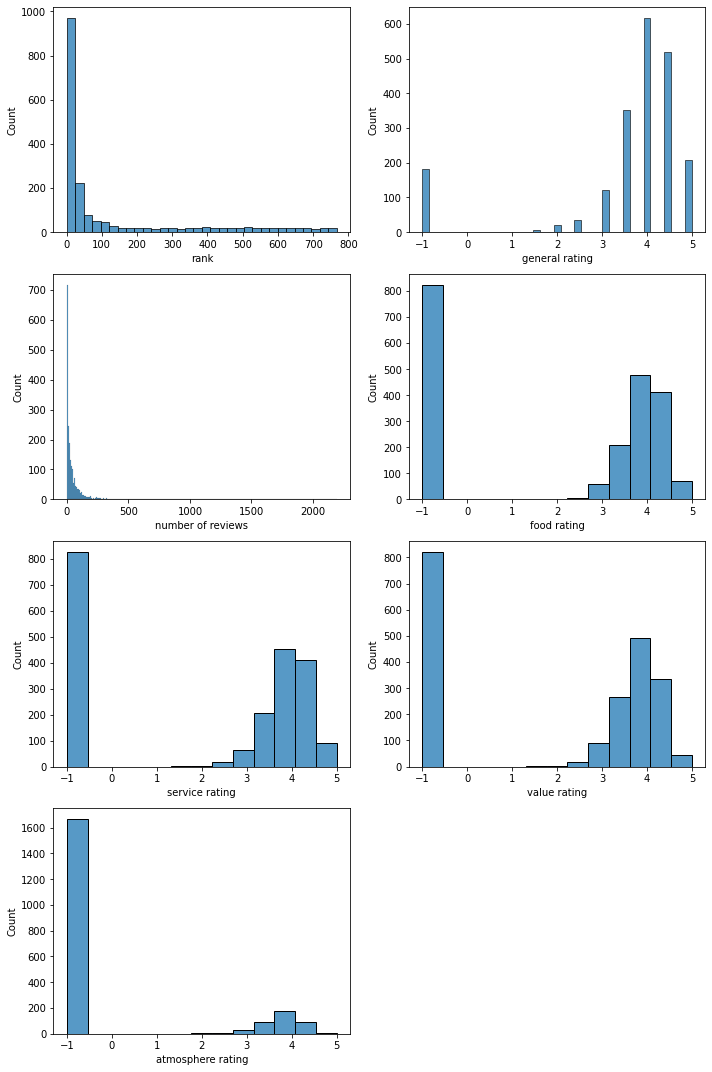

In [42]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible


let's take a closer look at number of reviews

### number of reviews

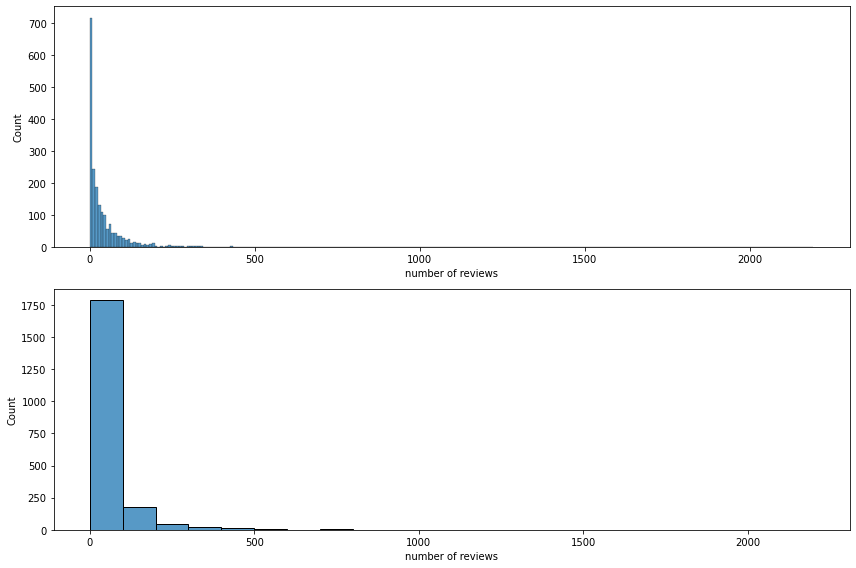

In [43]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [44]:
print(df_train["number of reviews"].value_counts())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0      182
1.0      109
2.0       99
4.0       68
6.0       66
        ... 
148.0      1
315.0      1
378.0      1
149.0      1
237.0      1
Name: number of reviews, Length: 266, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. how many exactly?

In [45]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


8.82% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [46]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 28.44%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because of a bad rating or maybe bcause of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [47]:
df_train['city'] = df_train['address'].str.split(" Belgium").str[0]
df_train['city'] = df_train['city'].str.split(",").str[-1]
df_train['city'] = df_train['city'].str.split(" ").str[1]

df_train

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id,city
1998,1.0,Nenuphar,3.0,361.0,$$ - $$$|Belgian|Dutch|European,"Afsneedorp 28, Afsnee 9051 Belgium",+32 9 221 22 32,http://www.restaurant-nenuphar.be/,https://www.restaurant-nenuphar.com/menu,True,reserveer@restaurant-nenuphar.be,False,False,3.0,3.0,3.0,3.5,NaN,NaN,No pricing available,"Belgian, Dutch, European",Vegetarian Friendly,"Lunch, Dinner","Reservations, Outdoor Seating, Seating, Highch...",3785414,Afsnee
1693,576.0,Hema,3.0,44.0,$|Dutch|European|Vegetarian Friendly,"Korenmarkt 3, Ghent 9000 Belgium",NaN,https://www.facebook.com/hemakorenmarkt/,NaN,False,NaN,False,False,3.0,3.0,3.5,-1.0,NaN,NaN,No pricing available,"Dutch, European","Vegetarian Friendly, Vegan Options","Brunch, Lunch, Dinner",Seating,10815677,Ghent
1022,402.0,Hotel de Lourdes,4.0,52.0,$$ - $$$|French|Belgian|Seafood,"O. L. Vrouwdreef 6 Oostakker, Ghent 9041 Belgium",+32 9 259 99 99,http://www.hoteldelourdes.be/,http://www.hoteldelourdes.be/wp-content/upload...,False,NaN,False,False,4.0,4.0,4.0,-1.0,NaN,NaN,No pricing available,"Belgian, French, Seafood, European",NaN,"Brunch, Lunch, Dinner","Reservations, Seating, Serves Alcohol, Table S...",10730255,Ghent
2474,NaN,Crepfull,-1.0,0.0,French|Belgian|European|Arabic,"Sint-Jacobsnieuwstraat 106, Ghent 9000 Belgium",+32 484 58 31 29,https://www.facebook.com/Crepfull-353394875335...,NaN,False,crepfull@gmail.com,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"French, Belgian, European, Arabic",NaN,NaN,NaN,18954161,Ghent
366,170.0,Dogs & Drinks,5.0,18.0,$|European|Gastropub|Dining bars,"Godshuizenlaan 33, Ghent 9000 Belgium",+32 498 29 63 28,http://www.dogsanddrinks.be/,https://www.dogsanddrinks.be/menu,True,info@dogsanddrinks.be,False,False,5.0,5.0,5.0,-1.0,Are you crazy about dogs? Then Dogs & Drinks d...,"Ben je helemaal gek op honden, maar kan je omw...",€8 - €20,"European, Gastropub, Dining bars",NaN,Drinks,"Reservations, Outdoor Seating, Seating, Serves...",19452351,Ghent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,43.0,Domino's Pizza Ronse,2.0,1.0,NaN,"Winston Churchillplein 7, Ronse 9600 Belgium",+32 55 57 57 07,https://www.facebook.com/Dominos-Pizza-Ronse-3...,NaN,True,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,NaN,NaN,"Lunch, Dinner",NaN,23368938,Ronse
1481,4.0,Bistro Onder den Toren,4.0,13.0,$$ - $$$|French|Steakhouse|Belgian,"Dorp 91/1, Oosterzele 9860 Belgium",+32 9 362 38 79,http://www.onder-den-toren.be/en,https://www.onder-den-toren.be/en/372-menu-cards,False,info@onder-den-toren.be,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"French, Steakhouse, Belgian, Deli, Wine Bar, E...",NaN,Dinner,"Reservations, Table Service, Seating",13337744,Oosterzele
912,20.0,Sushi Dendermonde,4.0,37.0,$$ - $$$|Japanese|Sushi|Asian,"Statieplein 34, Dendermonde 9200 Belgium",+32 52 20 06 77,http://www.sushidendermonde.be/,http://sushidendermonde.be/restaurant%20menu.html,False,info@sushidendermonde.be,False,False,4.5,4.0,4.0,-1.0,NaN,NaN,No pricing available,"Japanese, Sushi, Asian",Vegetarian Friendly,Dinner,"Takeout, Reservations, Table Service",8663310,Dendermonde
1522,84.0,De Gekroonde Hoofden Aalst,4.0,10.0,$$ - $$$|Belgian|Barbecue|European,"Molenstraat 49, Aalst Belgium",NaN,http://www.degekroondehoofden.be/,http://www.degekroondehoofden.be/menu#main,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"Belgian, Barbecue, European, Grill",NaN,NaN,Reservations,15246427,Aalst


we can also use some external libraries to extract latitute and longitude from the full address (so its easier to plot)

In [48]:
df_train["address"]

1998                  Afsneedorp 28, Afsnee 9051 Belgium
1693                    Korenmarkt 3, Ghent 9000 Belgium
1022    O. L. Vrouwdreef 6 Oostakker, Ghent 9041 Belgium
2474      Sint-Jacobsnieuwstraat 106, Ghent 9000 Belgium
366                Godshuizenlaan 33, Ghent 9000 Belgium
                              ...                       
2274        Winston Churchillplein 7, Ronse 9600 Belgium
1481                  Dorp 91/1, Oosterzele 9860 Belgium
912             Statieplein 34, Dendermonde 9200 Belgium
1522                       Molenstraat 49, Aalst Belgium
1656               Pilorijnstraat 18, Ghent 9000 Belgium
Name: address, Length: 2064, dtype: object

### Correlation between rank and restaurant type?

In the next cell we try to find a correlation between the popularity of a restaurant and the type of restaurant. For example: are Chinese restaurants the most popular? We find this out by using the average rank as popularity measure and the tags as restaurant type.

In [63]:
df_train_tags_cleaned = df_train.copy()

# splitting all the tags
df_train_tags_cleaned["tags"] = df_train_tags_cleaned["tags"].str.split("|")

# converting every tag into a new column
df_train_tags_cleaned = df_train_tags_cleaned.explode('tags').reset_index(drop=True)

# drop all tags with $ in
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").filter(lambda x : str(x).count("$") == 0)

# make a copy for in a later stage
df_train_tags_cleaned_copy = df_train_tags_cleaned.copy()

# keep the rank and tags column
df_train_tags_cleaned = df_train_tags_cleaned[["rank", "tags"]]



# group by tag and take the mean of all the ranks
df_train_tags_cleaned_sum = df_train_tags_cleaned.groupby("tags").count()
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").mean()
df_train_tags_cleaned["amount of restaurants"] = df_train_tags_cleaned_sum["rank"]
df_train_tags_cleaned["rank"] = df_train_tags_cleaned["rank"].round()
df_train_tags_cleaned = df_train_tags_cleaned.dropna()
df_train_tags_cleaned = df_train_tags_cleaned.sort_values(by=["amount of restaurants", "rank"], ascending=[False, True]) # sorting
df_train_tags_cleaned


,rank,amount of restaurants
tags,,
Belgian,86.0,1015
European,94.0,984
Vegetarian Friendly,121.0,282
French,73.0,254
Dutch,59.0,204
...,...,...
Filipino,366.0,1
Central American,406.0,1
Korean,500.0,1


In the table above we can see which restaurant type is the most popular. It might be interesting to start a restaurant with one of the top ranked types to have a good rank.

### Where to open my restaurant?

If you know what type of restaurant you want to open, a very important decision is to choose where to open your restaurant.
We want to know the following questions:

* Which city is has the highest average ranked restaurants?
* How many type restaurants are there in every city? (for example how many Chinese restaurants in Gent, Sint-Niklaas, ...)

The answer on the following questions can give insight on the location of the restaurant.

In the following cell we answer the first question, even though it's not sorted on the average rank. You firstly see the cities with one restaurant and a low (good) ranking. This doesn't tell much, this is why we sort first on the amount of restaurants.

In [50]:
df_train_city = df_train[["city", "rank"]]

count = df_train_city.groupby("city").count()

df_train_city = df_train_city.dropna()
df_train_city = df_train_city.groupby("city").mean()
df_train_city["amount of restaurants"] = count
df_train_city = df_train_city.sort_values(by=["amount of restaurants", "rank"], ascending=[False, True])


df_train_city


,rank,amount of restaurants
city,,
Ghent,381.880270,593
Aalst,62.814815,108
Sint-Niklaas,53.160920,87
Dendermonde,32.137255,51
Lokeren,25.772727,44
...,...,...
Baarle,2.000000,1
Elene,2.000000,1
Kemzeke,2.000000,1


In the next cell we answer the second question. For every restaurant type you can see how many there are in each city (if the city is not mentioned it means 0)

In [64]:
df_train_city_type = df_train_tags_cleaned_copy[["city", "tags"]]
df_train_city_type = df_train_city_type.groupby(["tags", "city"])["city"].count().to_frame()
df_train_city_type = df_train_city_type.rename(columns={"city": "city_count"})


df_train_city_type

# Find how many Chinese restaurants there are. The cities that are missing means that there aren't any there
# df_train_city_type.loc["Chinese"]


,city_count
city,
Aalst,4
Aalter,1
Astene,1
Belsele,1
Brakel,2
Buggenhout,1
Deinze,2
Dendermonde,5
Destelbergen,1


To find out how many restaurants there are for a specific cuisine. You can see where there is an ambundance of Chinese restaurants, that's not where you want to open one.
```py 
df_train_city_type.loc["Chinese"]
```

### Atmosphere clustering
Next we want to see if there are clusters formed of restaurants with a high atmosphere rating. To start we plot every restaurant on the map.

In [52]:
coords = pd.read_csv("coordinaten2.csv")

df_train_coords = df_train.merge(coords,on="id")

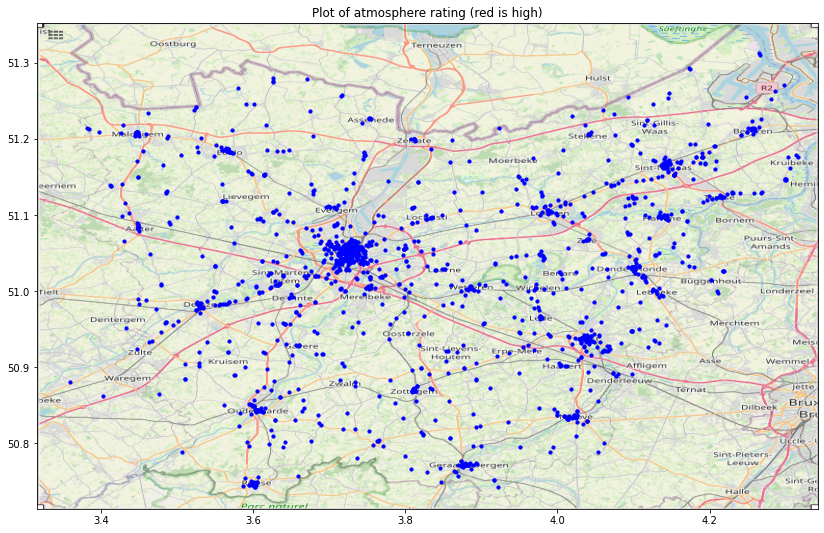

In [53]:
Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_train_coords.longitude, df_train_coords.latitude, zorder=1, alpha= 1, c='b',s=10)

ax.set_title('Plot of atmosphere rating (red is high)')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

To see if there is clustering, we map all the restaurants with a rating higher than 4.5 in red, everything lower in blue. Restaurants without an atmosphere rating (-1) are dropped.

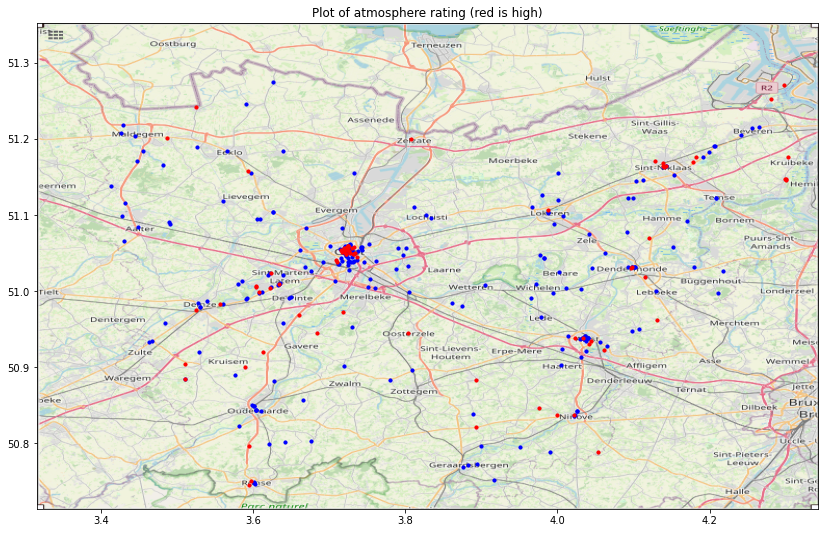

In [60]:
df_train_coords = df_train_coords.replace(-1, np.nan)

df_train_coords_low = df_train_coords[df_train_coords["atmosphere rating"] < 4.5]
df_train_coords_high = df_train_coords[df_train_coords["atmosphere rating"] >= 4.5]

Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_train_coords_low.longitude, df_train_coords_low.latitude, zorder=1, alpha= 1, c='b',s=10)
ax.scatter(df_train_coords_high.longitude, df_train_coords_high.latitude, zorder=1, alpha= 1, c='r',s=10)

ax.set_title('Plot of atmosphere rating (red is high)')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')


You can see that there are two clusters: Gent and Sint-Niklaas. Those places might have a pleasant ambience and can be a good place to locate a new restaurant.

### Restaurant features

When you start a new restaurant, you certainly don't want to offer less features than other restaurants. It can be handy to know which restaurant features there are available, but also which ones are not frequently offered. That's maybe where you can offer more.

In the next cell we make a table with the occurence the mentioned restaurant features.

In [55]:
df_train_copy = df_train.copy()
df_train_copy["restaurant features"] = df_train_copy["restaurant features"].str.split(",")
df_train_copy = df_train_copy.filter(["restaurant features", "rank"])

df_train_features_exploded = df_train_copy.explode('restaurant features').reset_index(drop=True)
df_train_features_exploded["restaurant features"] = df_train_features_exploded["restaurant features"].str.strip().str.lower()
df_train_features_exploded = df_train_features_exploded.dropna()

df_train_features_exploded = df_train_features_exploded.groupby("restaurant features").count()
df_train_features_exploded = df_train_features_exploded.rename(columns={"rank": "occurences"})
df_train_features_exploded = df_train_features_exploded.sort_values(by=["occurences"], ascending=False)

df_train_features_exploded


,occurences
restaurant features,
reservations,1258
seating,1240
table service,1194
serves alcohol,883
wheelchair accessible,718
outdoor seating,487
takeout,361
highchairs available,341
accepts credit cards,338


When we look at the top 10 restaurant features, we see some unexpected features like highchairs available, wheelchair accessible and takeout. These features are interesting to keep in mind when opening a restaurant.

### International popularity

Which restaurants have international reviews? Are international tourists more likely to eat in big cities or in small, local restaurants? To detect international reviews we made only a difference between languages that uses ASCII characters between 0-256. Anything higher we assume is international (such as Chinese, Arabic, ...)



In [56]:
def language_detector(text):
    """
    True means it's western language (English, Dutch, ...)
    False means it's an exotic language (Chinese, Arabic, ...)
    """
    text = str(text)
    west_count = 0
    exotic_count = 0
    for kar in text:
        ascii = ord(kar)
        if ascii > 256:
            exotic_count += 1
        else:
            west_count += 1
    
    return west_count > exotic_count

df_reviews = pd.read_csv("tripadvisor_dataset/reviews.csv")
df_reviews_train, df_reviews_test = train_test_split(df_reviews, test_size=0.2)

df_reviews_train["western"] = df_reviews_train["review"].apply(lambda x: language_detector(x))

df_reviews_train_false = df_reviews_train[df_reviews_train.western == False]
df_reviews_train_false


,id,reviewer name,title,date,rating,review,western
92531,3655227,Дарьядарина М,Бельгийская кухня,"May 30, 2015",4.0,Среднего уровня семейный ресторанчик в центре ...,False
69114,12408121,alenachernozem,Вьетнамский 🇻🇳 суп «Фо бо»🍲,"May 14, 2019",2.0,Шли сюда именно за традиционным вьетнамским су...,False
13379,6578428,A Tripadvisor China Member,很好吃的中餐,"July 9, 2015",5.0,超级推荐～～～来根特因为一碗牛肉面觉得超级值得呀呀呀呀呀～～～推荐哟～～～小笼包也好好吃！！...,False
10390,814598,Journey810700,ワーテルゾーイを食べに,"February 6, 2020",4.0,ゲントに行くならワーテルゾーイを食べてみたいと訪問。クリーミーで優しい味わいに癒されました。...,False
24848,3774380,theo574,Πολυ καλη επιλογη στο κεντρο της Γάνδης,"October 21, 2018",5.0,"Γευστικοτατα πιάτα, πολύ εξυπηρετικό και φιλικ...",False
...,...,...,...,...,...,...,...
116381,1495275,489antonk,Удобное место,"February 25, 2016",3.0,"Еда неплохая, выбор пива грамотный. Немного те...",False
108306,3569457,Irina_Feya,Уютно и тепло,"March 1, 2015",5.0,Были в Генте в последний день февраля. Ветренн...,False
24807,3774380,дмитрий п,Ресторан на площади Sint-Baafsplein,"April 5, 2019",5.0,Прекрасные мидии с травами. Работает не каждый...,False
116362,1495275,Happiness810220,シコンのグラタンが名物,"April 23, 2016",4.0,ツアーのディナーで訪問しました。運河のそばです。ほうれん草と香草？のスープ、シコンのグラタン...,False


In [57]:

df_reviews_train_false = df_reviews_train_false.groupby("id").count()

df_reviews_train_false = df_reviews_train_false.filter(["id", "date"])
df_reviews_train_false = df_reviews_train_false.rename(columns={"date": "occurences"})
df_reviews_train_false = df_reviews_train_false.sort_values(by=["occurences"], ascending=False)

df_reviews_train_false

,occurences
id,
814598,43
740683,43
1058490,33
796954,31
1924338,26
...,...
806734,1
806741,1
808958,1


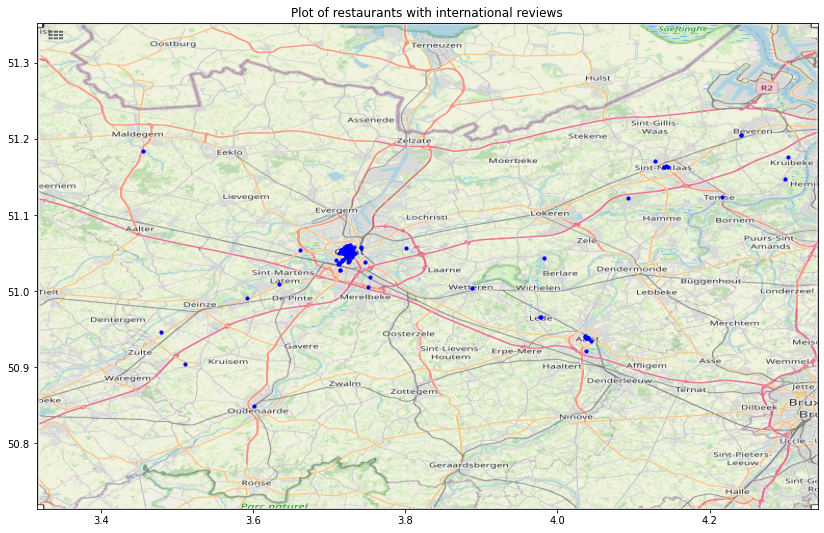

In [58]:

df_reviews_train_merged_coords = df_reviews_train_false.merge(coords, on="id")

Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_reviews_train_merged_coords.longitude, df_reviews_train_merged_coords.latitude, zorder=1, alpha= 1, c='b',s=10)

ax.set_title('Plot of restaurants with international reviews')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

We can clearly see a cluster of restaurants in Ghent. Popular cities attract more international customers than small local cities.

It's also interesting to see in what kind of cuisine types international people eat the most.

In [59]:
df_reviews_train_false_merged = df_reviews_train_false.merge(df_train, on="id")
df_reviews_train_false_merged["tags"] = df_reviews_train_false_merged["tags"].str.split("|")
df_reviews_train_false_merged = df_reviews_train_false_merged.explode('tags').reset_index(drop=True)
df_reviews_train_false_merged = df_reviews_train_false_merged.groupby("tags").filter(lambda x : str(x).count("$") == 0)
df_reviews_train_false_merged = df_reviews_train_false_merged[["occurences", "tags"]]
df_reviews_train_false_merged = df_reviews_train_false_merged.groupby("tags").sum().sort_values(by=["occurences"], ascending=False)
df_reviews_train_false_merged

,occurences
tags,
Belgian,449
European,361
Vegetarian Friendly,160
Bar,101
Seafood,101
Dutch,68
French,65
Cafe,54
Italian,42


It makes sense that when people travel they want to try the local cuisine. That is probably why Belgian cuisine is the most popular.

ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer